<a href="https://colab.research.google.com/github/Obura98/Nairobi_Hospital_Hypothyroidism_test/blob/main/Nairobi_Hospital_Hypothyroidism_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nairobi Hospital Hypothyroidism test

### Defining the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. Hypothyroidism is an abnormally low activity of the thyroid gland, resulting in retardation of growth and mental development in children and adults. The data collected focused on Thyroid patients

### Specifying the Question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



### Defining the Metric of Success

Optimal and reliable prediction Model of the sale of prices
80% Accuracy score of the four models that I will use in prediction
With the least RMSE score achievable

### Understanding the Context

## Experimental Desing taken

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

### Appropriateness of Data


One datasets is provided by the consulting company:

The dataset and glossary to use for this project can be found here Datasets

### Reading Data

#### Importing Relevant libraries

In [1]:


# Importing python libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style = 'darkgrid')
import requests
from io import StringIO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')

import pandas_profiling as pp

In [2]:
## Loading Data
nairobi_hospital=pd.read_csv("/content/hypothyroid.csv")

### Data Exploration

In [3]:
## Previewing the first five rows of our dataset
nairobi_hospital.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
## previewing the last five rows of our dataset
nairobi_hospital.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
## checking the size of our dataset
nairobi_hospital.shape
##we have 3163 rows and 26 columns....Dataset can be used for prediction

(3163, 26)

In [6]:
##checking for column data types
nairobi_hospital.info()
## Most of our variables are are objects:;;;;Meaning we will have to encode them in numericals in order to use them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [7]:
##checking for columns
nairobi_hospital.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [8]:
##checking the a sample of 50 in the dataset
nairobi_hospital.sample(50)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2517,negative,?,F,f,f,f,f,t,f,f,f,f,f,f,y,0.60,y,1.30,y,135,y,1.16,y,117,n,?
2244,negative,26,F,f,f,f,f,f,f,f,f,f,f,f,y,0.40,y,1.90,y,81,y,0.79,y,102,n,?
450,negative,75,F,f,f,f,f,f,f,f,f,t,f,f,y,0.40,y,1.10,y,85,y,0.80,y,106,n,?
998,negative,56,F,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,y,77,y,1.08,y,71,n,?
1880,negative,55,F,t,f,f,f,f,f,f,f,f,f,f,y,0.90,n,?,y,114,y,0.97,y,118,n,?
2247,negative,39,F,t,f,f,f,f,f,f,f,f,f,f,y,5,y,3.10,y,141,y,1.34,y,105,n,?
2655,negative,?,F,t,f,f,f,f,f,f,f,f,f,f,y,11,n,?,y,92,y,0.99,y,93,n,?
2037,negative,24,F,f,f,f,f,f,t,f,f,f,f,f,y,0,y,3,y,131,y,1.23,y,107,n,?
2866,negative,65,M,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,34
362,negative,38,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,2.50,y,131,y,1.19,y,110,n,?


In [9]:
###the column TBG has ???...lets examine it......I'm thinking that during data collection,,missing values were donated by ?...So 'i'll need to convert them to NAN then either drop them or fill them with eiher median and mode

nairobi_hospital['TBG'].unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

In [10]:
##checking for unique values in each column
nairobi_hospital.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [11]:
##checking the summary statistic of our dataset
nairobi_hospital.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


### Data Cleaning

In [12]:
###the columns are not uniform,,,for uniformity I'll need to convert them to lower case
nairobi_hospital.columns = map(str.lower, nairobi_hospital.columns)
nairobi_hospital.head()
##bam!! we have successfully lowered our columns to lowercase

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [13]:
nairobi_hospital.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [14]:
#### lets now deal with the ? in our rows.....we are going to replace the ? with NAN
nairobi_hospital['age'] = pd.to_numeric(nairobi_hospital['age'], errors = 'coerce') #'coerce' converts invalid parsing in this case '?' to NaN.
nairobi_hospital['tsh'] = pd.to_numeric(nairobi_hospital['tsh'], errors = 'coerce')
nairobi_hospital['t3'] = pd.to_numeric(nairobi_hospital['t3'], errors = 'coerce')
nairobi_hospital['tt4'] = pd.to_numeric(nairobi_hospital['tt4'], errors = 'coerce')
nairobi_hospital['tbg'] = pd.to_numeric(nairobi_hospital['tbg'], errors = 'coerce')
nairobi_hospital['fti'] = pd.to_numeric(nairobi_hospital['fti'], errors = 'coerce')
nairobi_hospital['t4u'] = pd.to_numeric(nairobi_hospital['t4u'], errors = 'coerce')
## checking if the change has been effected
new_df=nairobi_hospital[['age','tsh','t3','tt4','tbg','fti','t4u']]
new_df.sample(50)



,age,tsh,t3,tt4,tbg,fti,t4u
952,45.0,0.00,1.9,128.0,NaN,128.0,1.00
1188,NaN,NaN,NaN,NaN,36.0,NaN,NaN
950,62.0,0.80,1.5,106.0,NaN,103.0,1.03
2443,NaN,0.00,1.7,93.0,NaN,97.0,0.96
2772,NaN,0.00,1.6,91.0,NaN,100.0,0.91
177,NaN,1.50,1.7,75.0,NaN,89.0,0.84
418,84.0,0.00,0.7,137.0,NaN,164.0,0.84
62,NaN,19.00,2.3,66.0,NaN,61.0,1.09
3131,16.0,0.00,3.2,178.0,NaN,189.0,0.94
2492,4.0,0.40,NaN,124.0,NaN,113.0,1.10


In [15]:
### lets now check for duplicates in our dataset
nairobi_hospital.duplicated().value_counts()
##we have 77 duplicated value....This wont affect our dataframe so we will drop the duplicated values
nairobi_hospital.drop_duplicates(keep='first',inplace = True)
print("data", nairobi_hospital.shape)
nairobi_hospital.duplicated().sum()


data (3086, 26)


0

In [16]:
### lets check for missing data in our dataset
nairobi_hospital.isnull().sum()
##The null values are so many,,,dropping them will affect our modelling the best way to do this is to replace null values with the mode
for column in ['age','tsh', 't3','tbg','fti','t4u','tt4']:
    nairobi_hospital[column].fillna(nairobi_hospital[column].mode()[0], inplace=True)
###checking if change has been effected
nairobi_hospital.isnull().any()
##Double bam!!!change has been effected

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
tsh_measured                 False
tsh                          False
t3_measured                  False
t3                           False
tt4_measured                 False
tt4                          False
t4u_measured                 False
t4u                          False
fti_measured                 False
fti                          False
tbg_measured                 False
tbg                          False
dtype: bool

TypeError: ignored

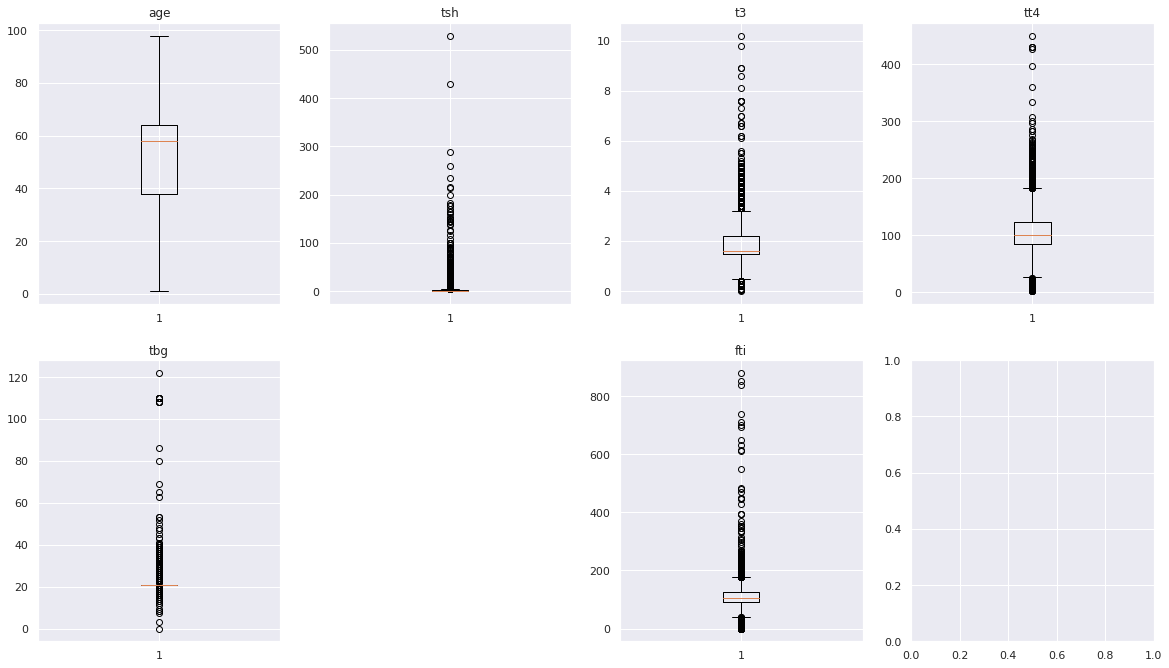

In [17]:
## its now time to check for outliers in our dataset


columns_dict={ 'age':1, 'tsh':2, 't3':3, 'tt4':4, 'tbg':5, 'fti':6,
       'fti':7, 'query_hypothyroid':8}
plt.figure(figsize=(20,30))
# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(nairobi_hospital[variable])
  plt.title(variable)
plt.show()
##There are outliers in our dataframe but we wont drop them as they play an important role in model prediction

In [22]:
## checking for anomalies in the housing dataset
nairobi_hospital.nunique()

status                         2
age                           92
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
tsh_measured                   2
tsh                          239
t3_measured                    2
t3                            69
tt4_measured                   2
tt4                          268
t4u_measured                   2
t4u                          158
fti_measured                   2
fti                          280
tbg_measured                   2
tbg                           52
dtype: int64

EDA

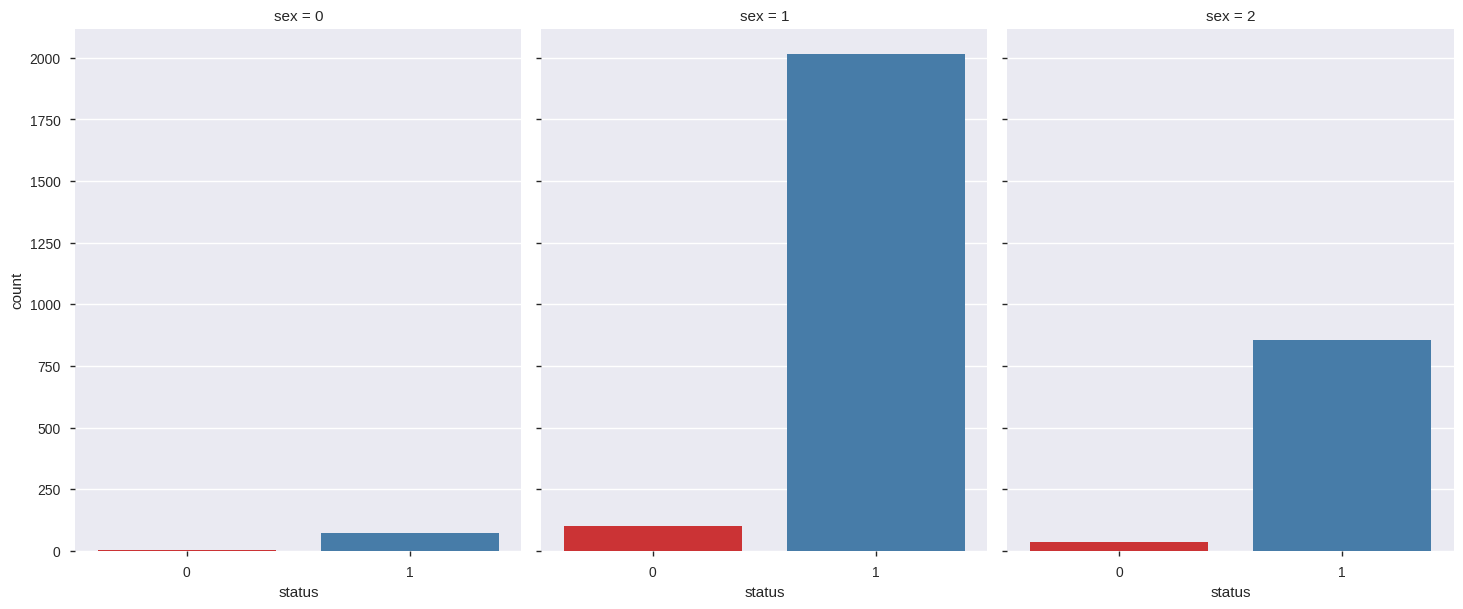

In [92]:

# Plotting bar charts
#
sns.catplot("status", col="sex", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

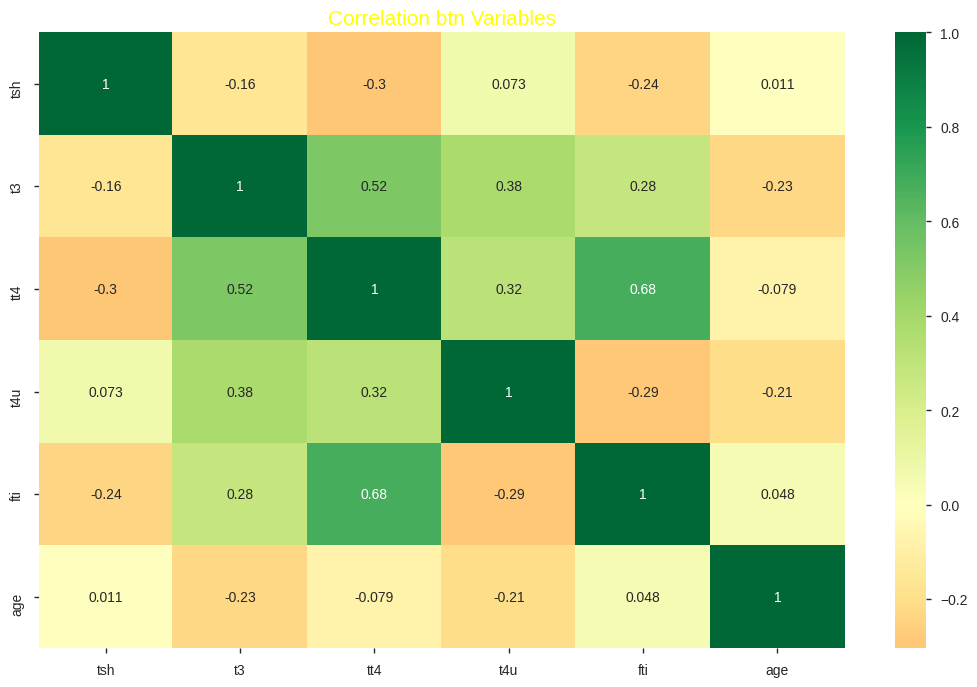

In [96]:

# Plotting a heatmap to show correlations between variables
#
corr = df[['tsh', 't3', 'tt4', 't4u', 'fti', 'age']].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlation btn Variables', fontsize = 15, color = 'yellow')
plt.show()

<Figure size 640x440 with 0 Axes>

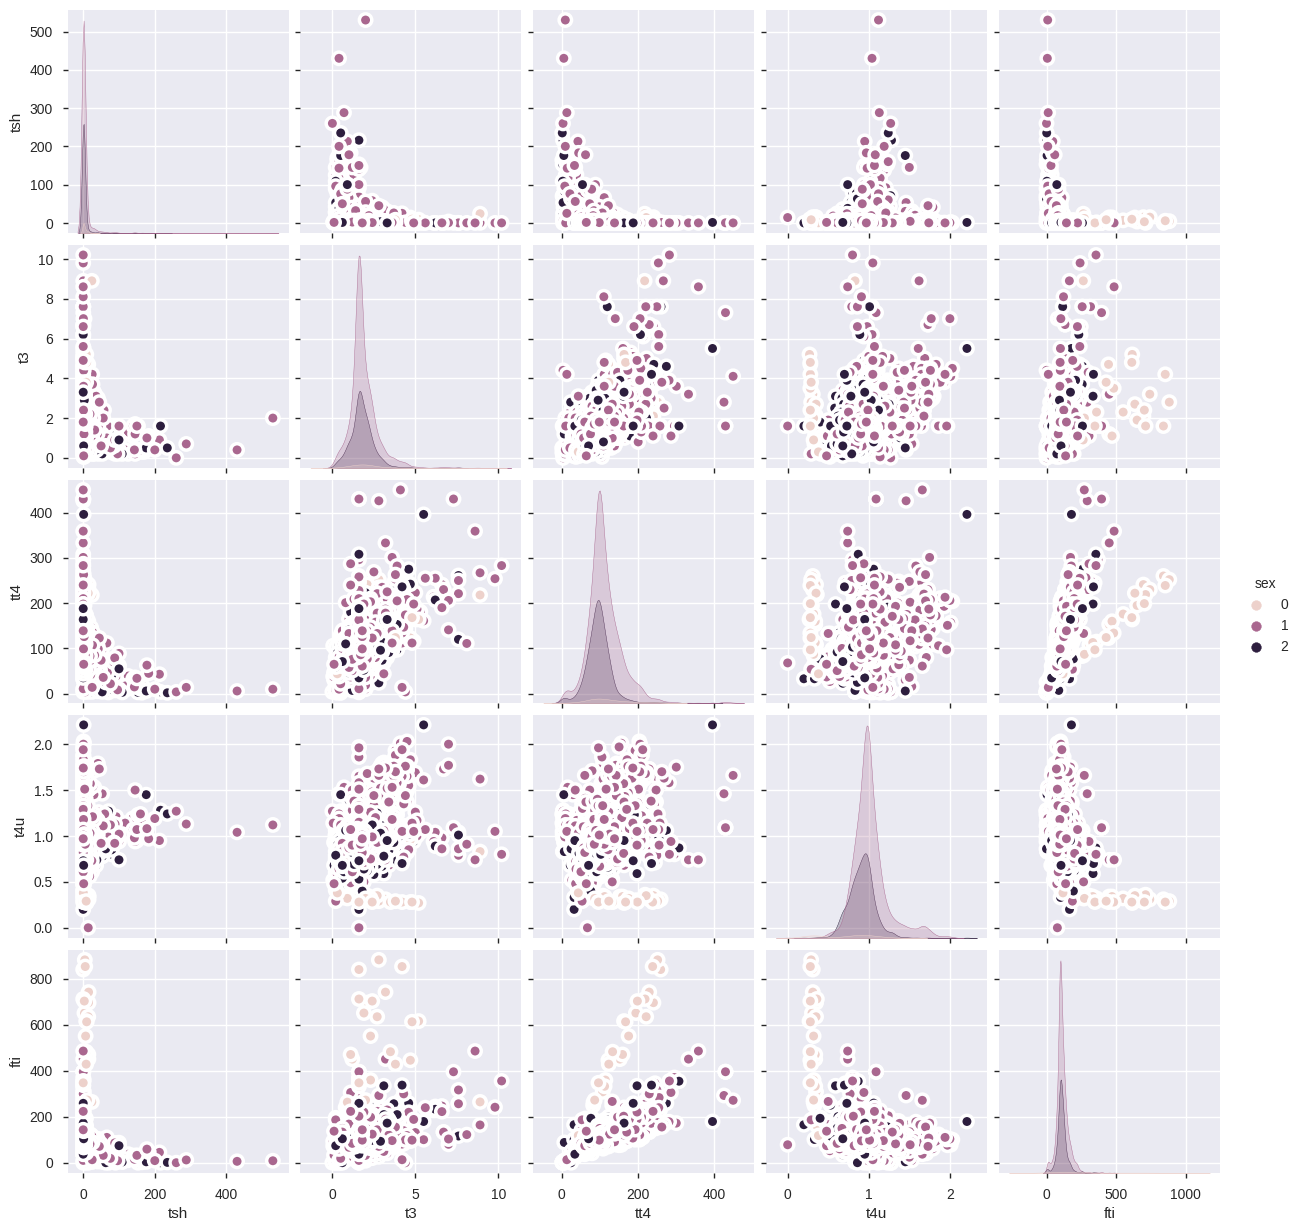

In [97]:
###Pair plots
plt.figure(dpi= 80)
sns.pairplot(df[['tsh', 't3', 'tt4', 't4u', 'fti', 'sex']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

### Decision Trees Prediction

#### Random Forest

In [24]:
nairobi_hospital.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,21.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,21.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,21.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,21.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,21.0


In [ ]:
nairobi_hospital.describe()

In [25]:
##we are going to make a copy of our dataframe
df=nairobi_hospital.copy()

In [26]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,21.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,21.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,21.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,21.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,21.0


In [27]:
##converting all our categorical columns to category
df['status'] = df['status'].astype('category')
df['sex'] = df['sex'].astype('category')
df['on_thyroxine'] = df['on_thyroxine'].astype('category')
df['query_on_thyroxine'] = df['query_on_thyroxine'].astype('category')
df['on_antithyroid_medication'] = df['on_antithyroid_medication'].astype('category')
df['thyroid_surgery'] = df['thyroid_surgery'].astype('category')
df['query_hypothyroid'] = df['query_hypothyroid'].astype('category')
df['query_hyperthyroid'] = df['query_hyperthyroid'].astype('category')
df['pregnant'] = df['pregnant'].astype('category')
df['sick'] = df['sick'].astype('category')
df['tumor'] = df['tumor'].astype('category')
df['lithium'] = df['lithium'].astype('category')
df['goitre'] = df['goitre'].astype('category')
df['tsh_measured'] = df['tsh_measured'].astype('category')
df['t3_measured'] = df['t3_measured'].astype('category')
df['tt4_measured'] = df['tt4_measured'].astype('category')
df['t4u_measured'] = df['t4u_measured'].astype('category')
df['fti_measured'] = df['fti_measured'].astype('category')
df['tbg_measured'] = df['tbg_measured'].astype('category')

In [28]:
##checking if change has been effected
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        3086 non-null   float64 
 2   sex                        3086 non-null   category
 3   on_thyroxine               3086 non-null   category
 4   query_on_thyroxine         3086 non-null   category
 5   on_antithyroid_medication  3086 non-null   category
 6   thyroid_surgery            3086 non-null   category
 7   query_hypothyroid          3086 non-null   category
 8   query_hyperthyroid         3086 non-null   category
 9   pregnant                   3086 non-null   category
 10  sick                       3086 non-null   category
 11  tumor                      3086 non-null   category
 12  lithium                    3086 non-null   category
 13  goitre                     3086 n

In [29]:
###We are going to encode all our categorical variables
df['status'] = df['status'].cat.codes
df['sex'] = df['sex'].cat.codes
df['on_thyroxine'] = df['on_thyroxine'].cat.codes
df['query_on_thyroxine'] = df['query_on_thyroxine'].cat.codes
df['on_antithyroid_medication'] = df['on_antithyroid_medication'].cat.codes
df['thyroid_surgery'] = df['thyroid_surgery'].cat.codes
df['query_hypothyroid'] = df['query_hypothyroid'].cat.codes
df['query_hyperthyroid'] = df['query_hyperthyroid'].cat.codes
df['pregnant'] = df['pregnant'].cat.codes
df['sick'] = df['sick'].cat.codes
df['tumor'] = df['tumor'].cat.codes
df['lithium'] = df['lithium'].cat.codes
df['goitre'] = df['goitre'].cat.codes
df['tsh_measured'] = df['tsh_measured'].cat.codes
df['t3_measured'] = df['t3_measured'].cat.codes
df['tt4_measured'] = df['tt4_measured'].cat.codes
df['t4u_measured'] = df['t4u_measured'].cat.codes
df['fti_measured'] = df['fti_measured'].cat.codes
df['tbg_measured'] = df['tbg_measured'].cat.codes

In [30]:
##checking if change has been effected
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,72.0,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,21.0
1,0,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,21.0
2,0,24.0,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,21.0
3,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,21.0
4,0,77.0,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,21.0


In [31]:
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.00000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,0.954310,52.232016,1.266040,0.144524,0.017822,0.013610,0.033377,0.076150,0.076150,0.019767,0.031432,0.012962,0.000648,0.031108,0.852560,4.952793,0.77965,1.860143,0.922229,107.874238,0.922553,0.977748,0.922878,114.140279,0.081335,21.819054
std,0.208846,18.065430,0.492597,0.351677,0.132327,0.115883,0.179647,0.265282,0.265282,0.139220,0.174511,0.113128,0.025453,0.173638,0.354602,22.276447,0.41455,0.875818,0.267854,42.932366,0.267342,0.216874,0.266829,57.969106,0.273393,6.176385
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000,0.000000,21.000000
50%,1.000000,58.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.400000,1.00000,1.600000,1.000000,100.000000,1.000000,0.980000,1.000000,105.000000,0.000000,21.000000
75%,1.000000,64.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.700000,1.00000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000,21.000000
max,1.000000,98.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.00000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000,122.000000


In [32]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if a patient status is having Hypothyroidisms or  so let's use that column as our Y 
y = df['status'].values


test_features = df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later,

X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.957883,0.955695
std,0.200964,0.184543
min,0.000000,0.011813
25%,1.000000,0.999944
50%,1.000000,0.999944
75%,1.000000,0.999944
max,1.000000,0.999944


In [33]:
### lets assess how our random forest is doing
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
##our model has done a good prediction as the RMSE of 0.06894888771355816 is lower that 10% of our mean 0.954295 (0.0954295)


Mean Absolute Error: 0.01307697901575676
Mean Squared Error: 0.004753949116936851
Root Mean Squared Error: 0.06894888771355816


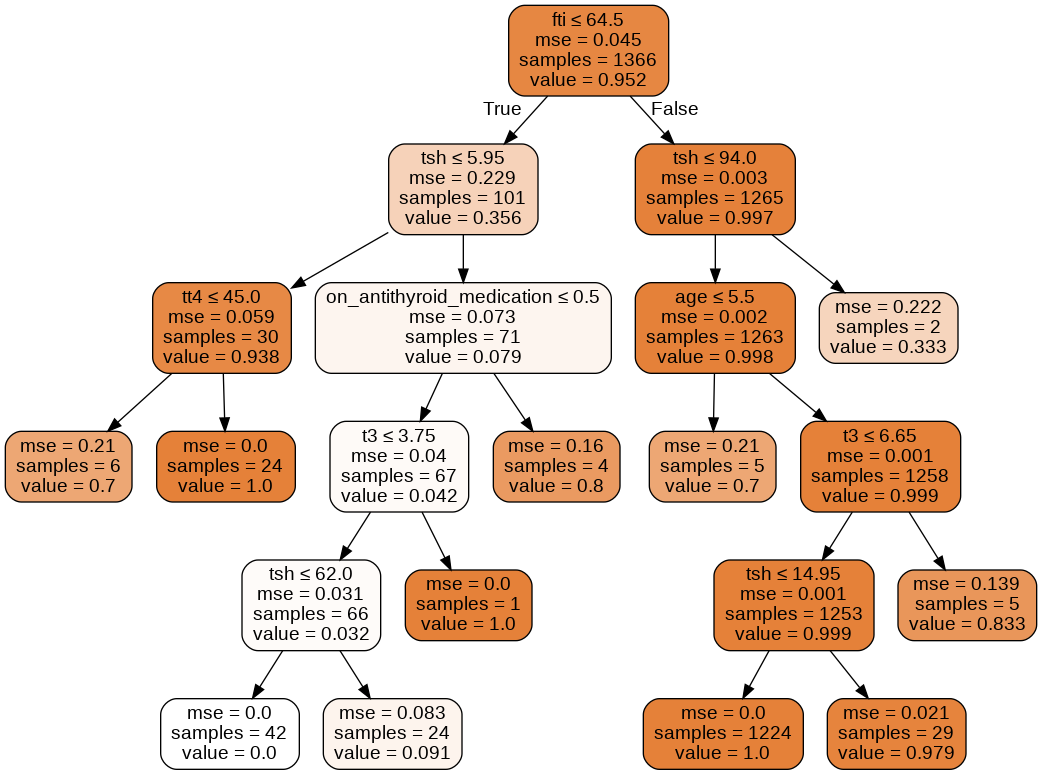

In [34]:
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('df.png')
Image(graph.create_png())

Feature Importance

In [35]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.03), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.29), ('t3_measured', 0.0), ('t3', 0.01), ('tt4_measured', 0.0), ('tt4', 0.01), ('t4u_measured', 0.0), ('t4u', 0.0), ('fti_measured', 0.0), ('fti', 0.65), ('tbg_measured', 0.0), ('tbg', 0.0)]

Variable: fti                  Importance: 0.65
Variable: tsh                  Importance: 0.29
Variable: on_antithyroid_medication Importance: 0.03
Variable: age                  Importance: 0.01
Variable: t3                   Importance: 0.01
Variable: tt4                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variabl

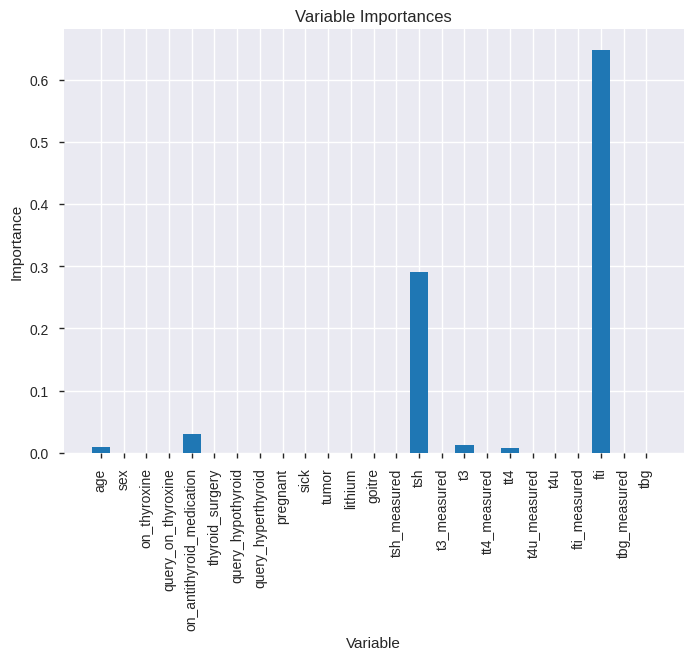

In [36]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');



The three imporant features used for predicting hypothyrodism are:


1.   fti
2.   tsh    
3.   on_antithyroid_medication               



Remodelling with the most important features only
*

In [42]:
from sklearn.model_selection import train_test_split
#important=[fti,tsh,on_antithyroid_medication,age ,t3,tt4]                  ]
# Split the independent and dependent variables
# We want to predict if a patient status is having Hypothyroidisms or  so let's use that column as our Y 
y = df['status'].values
test_features
#test_features = df.columns.to_list()
#test_features.remove('status')


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later,

X = df[['fti','tsh','on_antithyroid_medication','age' ,'t3','tt4']] .values

# Train using 80% of the data.
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X1_train, y1_train)

# Predict based on the model we've trained
y_pred1 = forest.predict(X1_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.957883,0.955932
std,0.200964,0.183919
min,0.000000,0.017502
25%,1.000000,0.999944
50%,1.000000,0.999944
75%,1.000000,0.999944
max,1.000000,0.999944


In [46]:
### lets assess how our random forest is doing
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred1)))
##our RMSE score has not changed showing that even after using the most important parameters,, our prediction wont be affected that much

Mean Absolute Error: 0.013037230505775491
Mean Squared Error: 0.004701085771628004
Root Mean Squared Error: 0.06856446435018657


Parameter Tuning

In [47]:
## We are going to check the parameters we are going to tune
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

##The best parameter are: a max_depth of 5 and n_estimators of 50

The best parameters are: {'max_depth': 5, 'n_estimators': 50}


In [49]:

# Applying the best parameters to the model
#
# Selecting only important features and the y variable
from sklearn.model_selection import train_test_split
#important=[fti,tsh,on_antithyroid_medication,age ,t3,tt4]                  ]
# Split the independent and dependent variables
# We want to predict if a patient status is having Hypothyroidisms or  so let's use that column as our Y 
y = df['status'].values
test_features
#test_features = df.columns.to_list()
#test_features.remove('status')


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later,

X = df[['fti','tsh','on_antithyroid_medication','age' ,'t3','tt4']] .values

# Train using 80% of the data.
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 50, random_state=42, max_depth=5)
forest = forest.fit(X1_train, y1_train)

# Predict based on the model we've trained
y_pred1 = forest.predict(X1_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.957883,0.955932
std,0.200964,0.183919
min,0.000000,0.017502
25%,1.000000,0.999944
50%,1.000000,0.999944
75%,1.000000,0.999944
max,1.000000,0.999944


In [55]:

### lets assess how our random forest is doing
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred1)))
### Our RMSE score has improved to 0.07859236055202898...This is a quite better prediction that the earlier predictions we had made

Mean Absolute Error: 0.014981576468555287
Mean Squared Error: 0.006176759137140121
Root Mean Squared Error: 0.07859236055202898


AdaBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if a patient status is having Hypothyroidisms or  so let's use that column as our Y 
y = df['status'].values


test_features = df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later,

X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=20)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# Measuring the accuracy of the model
#
acc_1 = accuracy_score(y_test, y_pred_ada)
#f1_1 = f1_score(y_test, y_pred)

print(f'The accuracy score is: {acc_1}')
##With adaboost our accuracy has increased to 80%

Support Vector Classifier


In [78]:

# Removing the target column
status = df.drop('status', axis=1)
y = df['status']

# Applying the reduction algorithm: PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(status)
X = pca.transform(status)
X.shape




# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later,

X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


In [79]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [82]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
###our model got an accuracy score of 96 %...This is quite higher compared to other models

0.9654427645788337
[[ 14  28]
 [  4 880]]


Fitting the model: Radial basis function (rbf)

In [83]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [85]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
## Our accuracy score increased to 97% This kernel performs better than the previous

0.9751619870410367
[[ 24  18]
 [  5 879]]


Fitting the model: Sigmoid function

In [86]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [88]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
##This kernel perfomance was the lowest with an accuracy score of 95%

0.9503239740820735
[[ 12  30]
 [ 16 868]]


Comparison of the Kernel Performance

When we compare the performance of the three kernel, it clear that sigmoid performs the worst with an accuracy score of 95 %. This is because the sigmoid function returns two values, 0 and 1 hence its more suited to binary classification problems.

On the other hand, we can see that the rbf kernel also know as Gaussian Kernel achieved a 97% prediction rate. The Polynomial kernel got an accuracy of 96%

Challenging the Solution

In [91]:
# Importing different classification models
#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Creating a list of classifier algorithms to compare with
#
models = [GradientBoostingClassifier(), DecisionTreeClassifier(), XGBClassifier(), KNeighborsClassifier(),\
          GaussianNB(), LogisticRegression()]

# Creating lists of the algorithms, to store the accuracy scores of each fold
#
GradientBoosting, DecisionTree, XGB, KNeighbors, GaussianNB, LogisticRegression = ([] for x in range(6))

# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [GradientBoosting, DecisionTree, XGB, KNeighbors, GaussianNB, LogisticRegression]

y = df['status'].values


test_features = df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later,

X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10, shuffle = True, random_state = 0)

# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'f1', cv = kfold)))
  
# Creating a dataframe of all the scores from the iterations for each model
#
scores = pd.DataFrame({'GradientBoosting': GradientBoosting, 'DecisionTree': DecisionTree, 'XGB': XGB,\
              'KNeighbors': KNeighbors, 'GaussianNB': GaussianNB, 'LogisticRegression': LogisticRegression}, index = range(1, 11))

# Calculating the mean and standard deviation score of each algorithm
#
scores.loc['mean'] = scores.mean()
scores.loc['std'] = scores.std()

# Previewing the scores dataframe
#
scores

,GradientBoosting,DecisionTree,XGB,KNeighbors,GaussianNB,LogisticRegression
1,0.998314,0.994924,1.000000,0.998319,0.402145,0.996644
2,0.994941,0.993220,0.994941,0.991597,0.446194,0.991597
3,0.998302,0.998302,1.000000,0.996610,0.462338,0.993243
4,0.996575,0.994872,0.996575,0.993174,0.400000,0.991482
5,0.998285,0.991424,0.998285,0.993174,0.459103,0.989761
6,0.991625,0.991625,0.991597,0.991625,0.314607,0.989967
7,0.991364,0.993103,0.994836,0.987993,0.467192,0.991453
8,0.987910,0.982759,0.989655,0.986207,0.531328,0.981132
9,0.998319,0.996633,0.998319,0.994958,0.451948,0.998325
10,0.994941,0.994941,0.993243,0.991568,0.487310,0.991597


Conclusion
1. The SVM performs well in the prediction with an accuracy score of 97%
2. 